In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = pd.read_csv('spotify-2023.csv', encoding='latin-1')

##Anális exploratorio

In [3]:
data.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [4]:
# Información básica
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [5]:
#Streams, palylists y charts con valor numérico
data['streams'] = pd.to_numeric(data['streams'], errors='coerce')
data['in_deezer_playlists'] = pd.to_numeric(data['in_deezer_playlists'], errors='coerce')
data['in_shazam_charts'] = pd.to_numeric(data['in_shazam_charts'], errors='coerce')


In [6]:
print(data.isna().sum())
data[data.duplicated(keep='last')]

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  1
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists     79
in_deezer_charts         0
in_shazam_charts        57
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%


Se eliminan los datos sin numero de streams y se obtienen las variables numéricas

In [7]:
data.dropna(subset=['streams'], inplace=True)
numerical_cols = data.select_dtypes(include='number').columns

##Análisis estadístico y de correlaccion entre variables

In [8]:
numerical_cols=data.select_dtypes(include='number').columns
data[numerical_cols].describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,9.520000e+02,952.000000,952.000000,873.000000,952.000000,895.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000
mean,1.556723,2018.288866,6.038866,13.944328,5202.565126,12.022059,5.141374e+08,67.866597,51.963235,109.804124,2.669118,51.233520,122.553571,66.984244,51.406513,64.274160,27.078782,1.582983,18.214286,10.138655
std,0.893331,11.011397,3.564571,9.197223,7901.400683,19.582405,5.668569e+08,86.470591,50.628850,178.903937,6.038152,126.546992,28.069601,14.631282,23.480526,16.558517,26.001599,8.414064,13.718374,9.915399
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,2.762000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.000000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,874.500000,0.000000,1.416362e+08,13.000000,7.000000,12.000000,0.000000,0.000000,99.750000,57.000000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2216.500000,3.000000,2.905309e+08,34.000000,38.500000,36.000000,0.000000,2.000000,121.000000,69.000000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5573.750000,16.000000,6.738690e+08,88.000000,87.000000,110.000000,2.000000,36.000000,140.250000,78.000000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,3.703895e+09,672.000000,275.000000,974.000000,58.000000,953.000000,206.000000,96.000000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


* Se deben conservar los datos extremos que se presentan en las variables de reproducciones, aparicion en playlists y charts de las diferentes plataformas musicales dado que son canciones que se vuelven virales de forma extraordinaria debido a diferentes factores sociales y económicos.
* Los datos extremos en número de artistas, año de lanzamiento y algunas características de las melodías son parte de las canciones que salen de lo convencional en cuanto a las preferencias durante el año 2023.

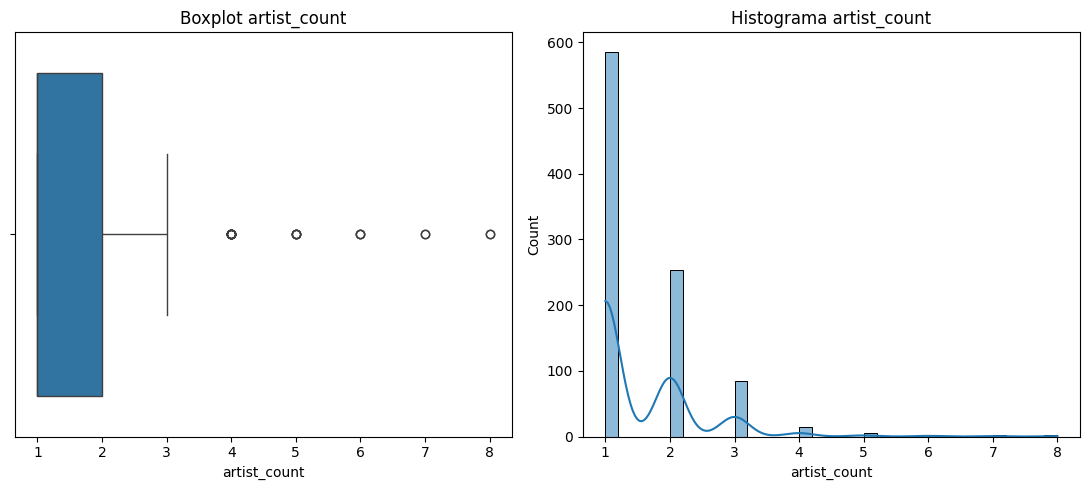

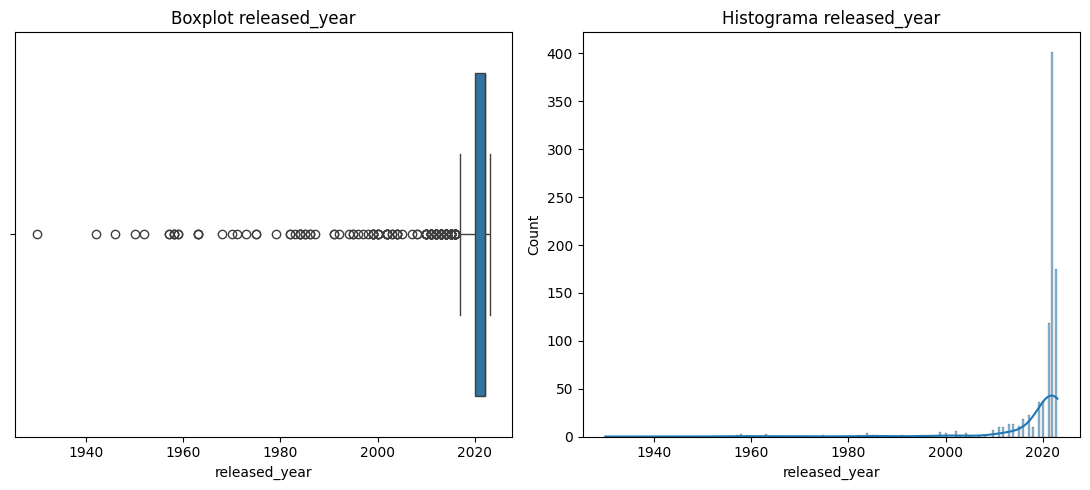

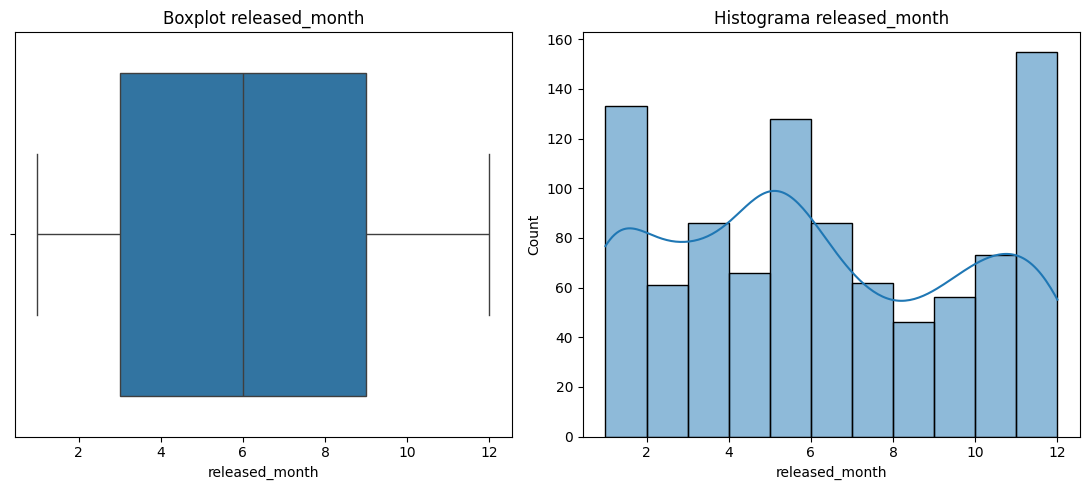

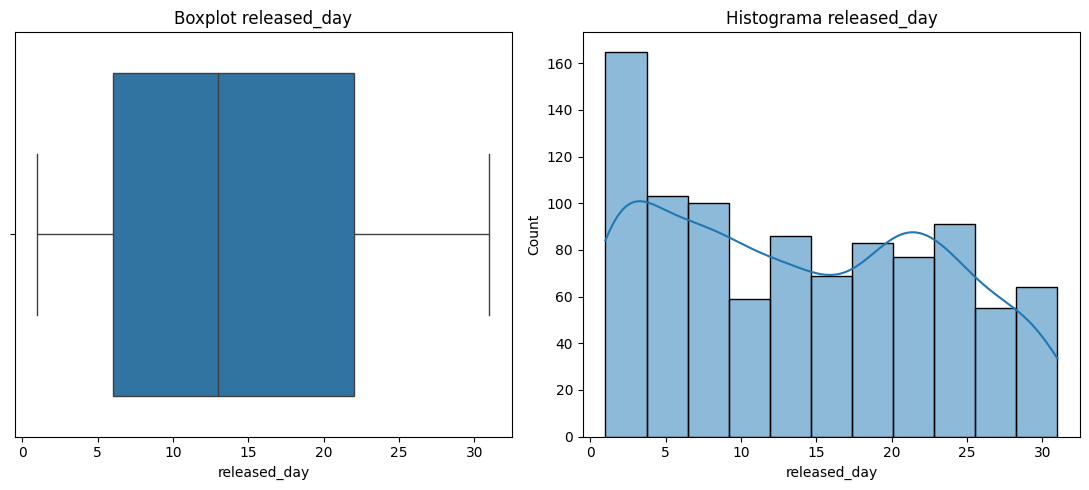

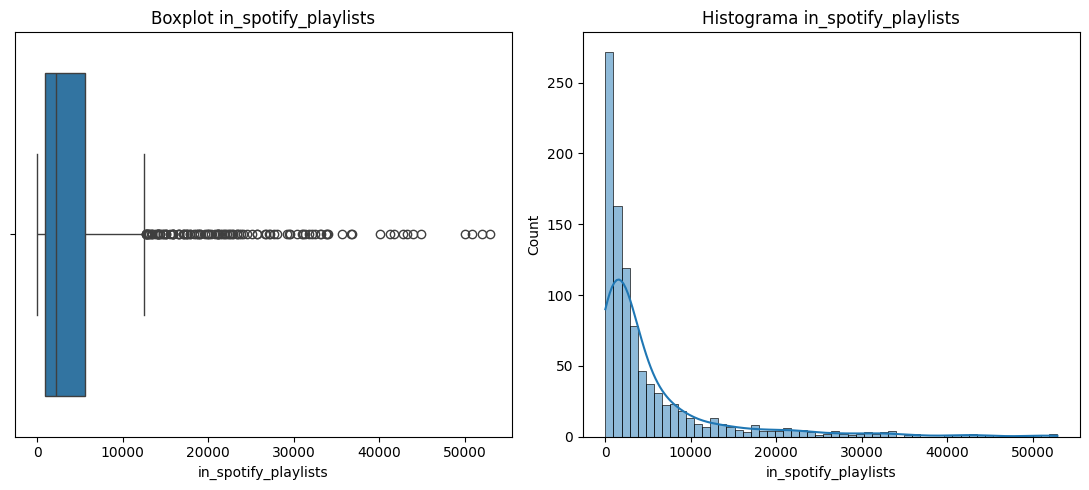

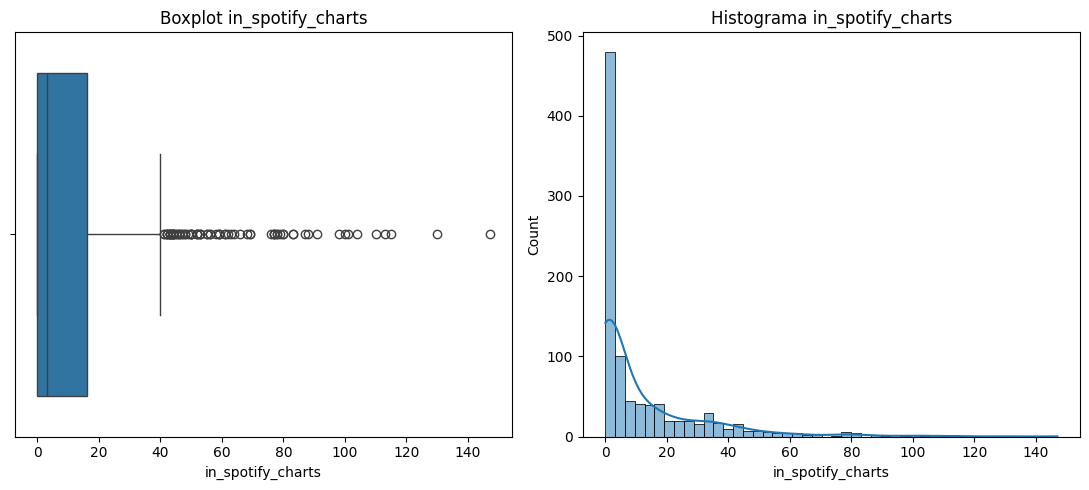

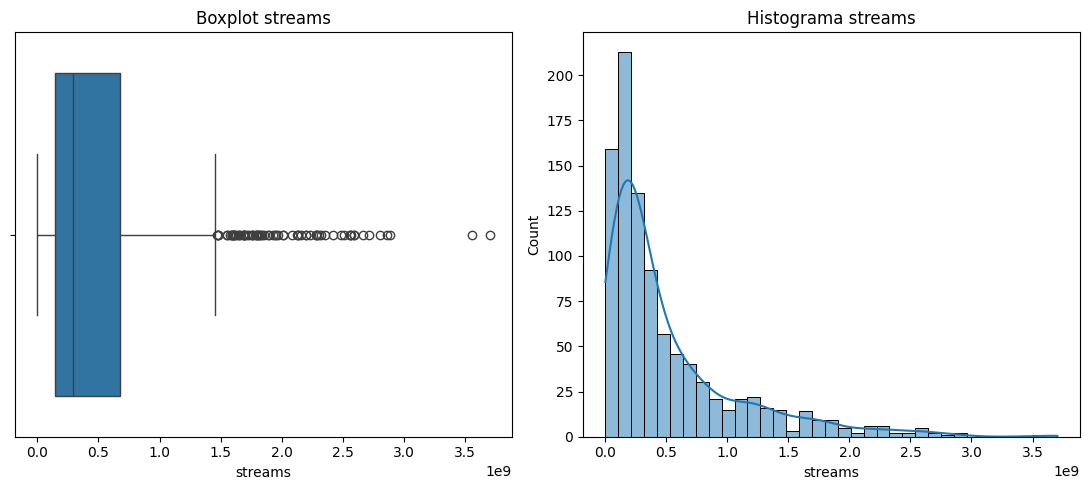

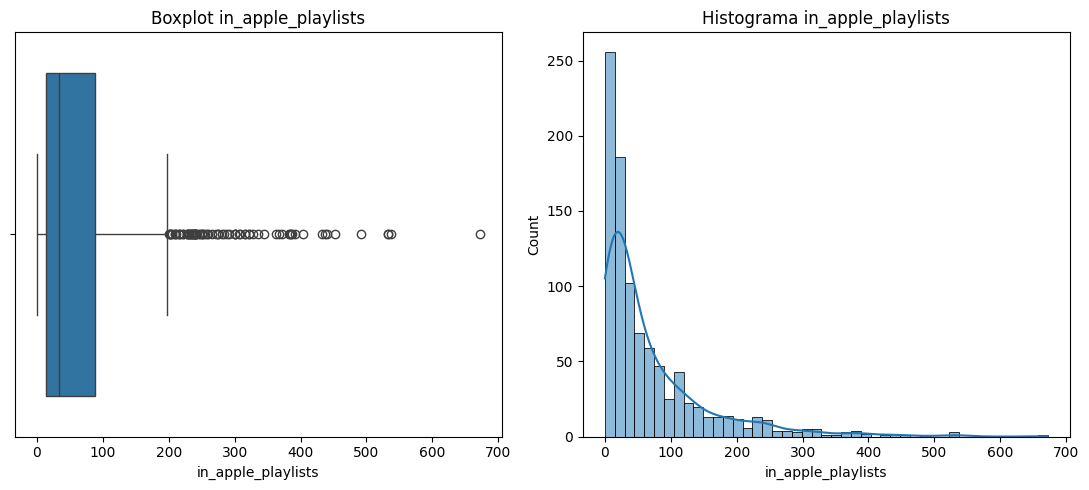

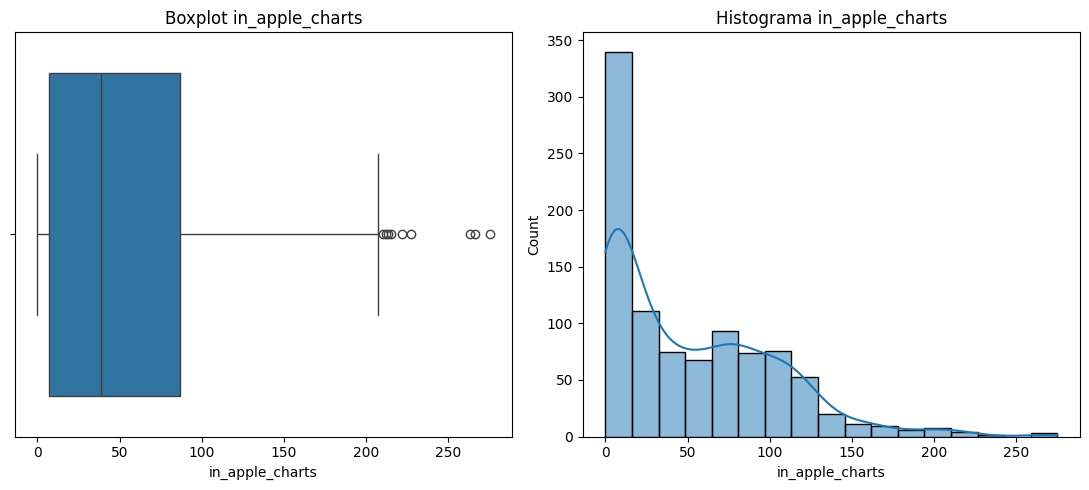

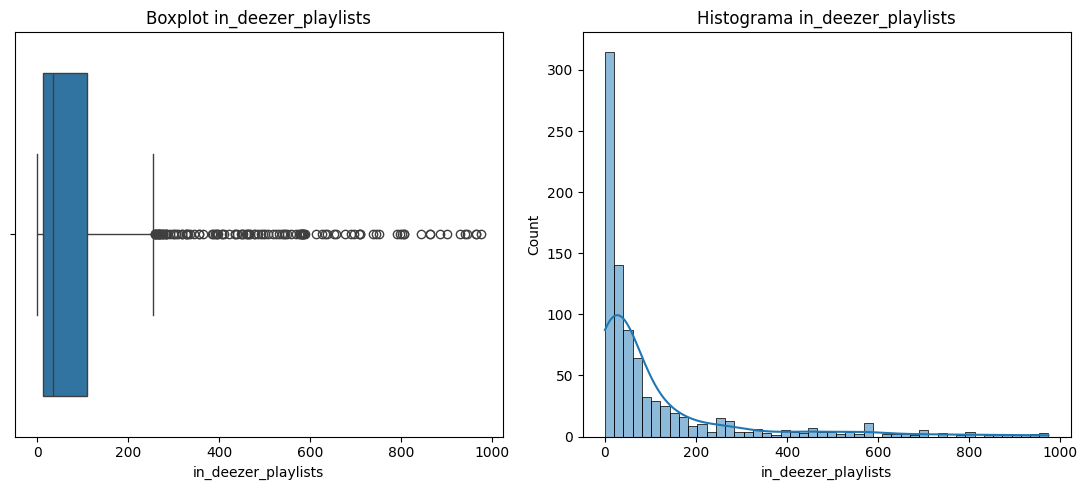

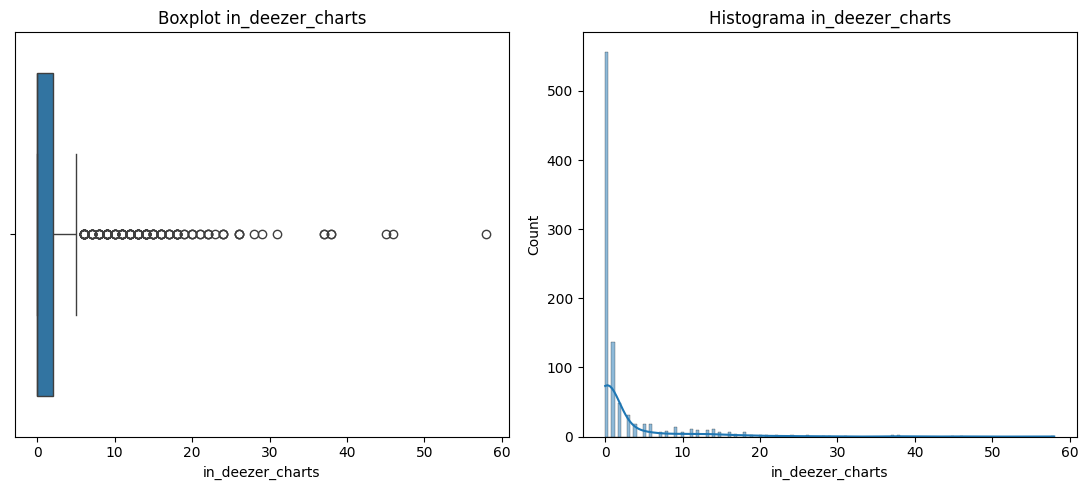

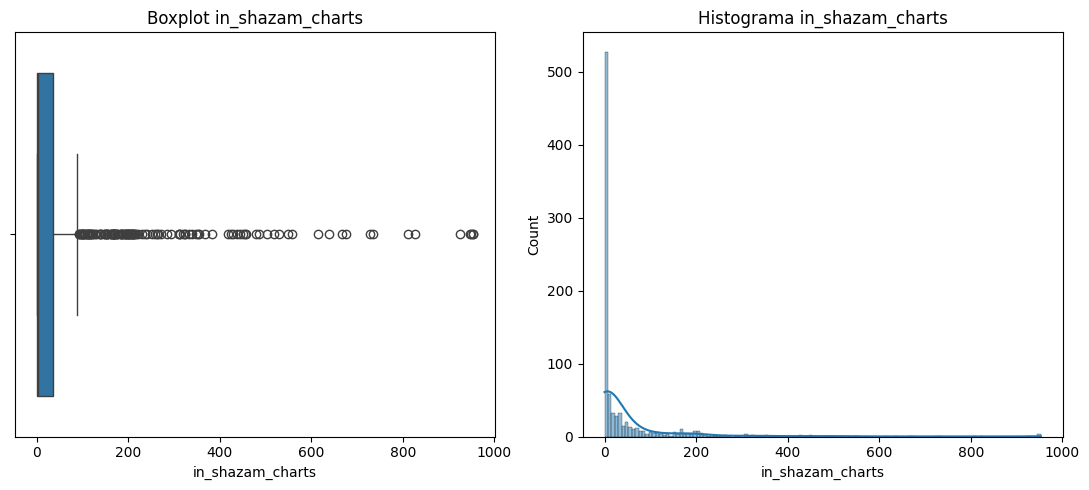

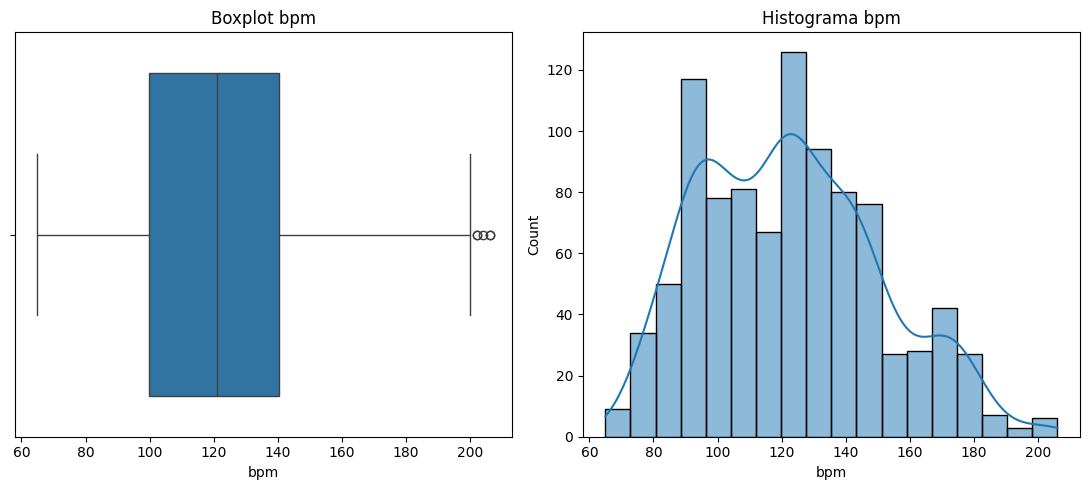

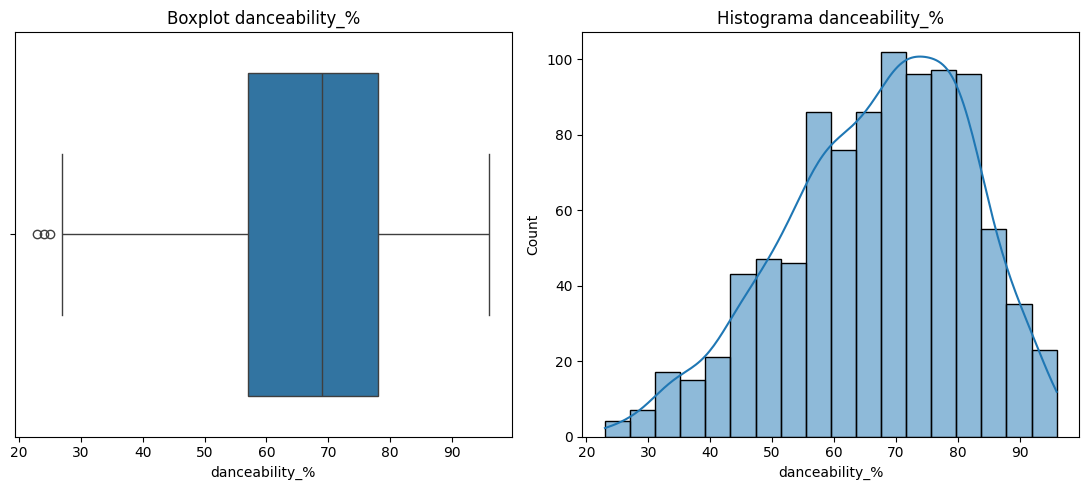

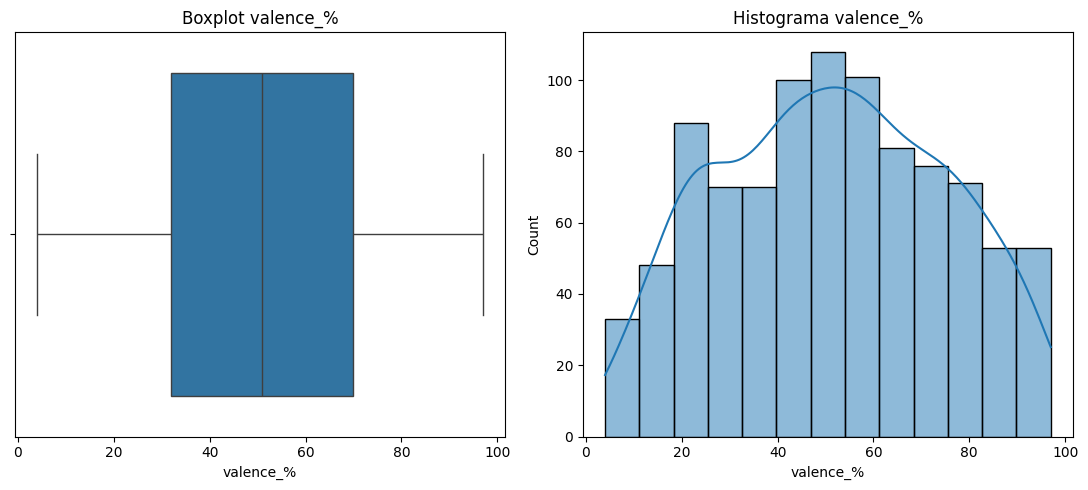

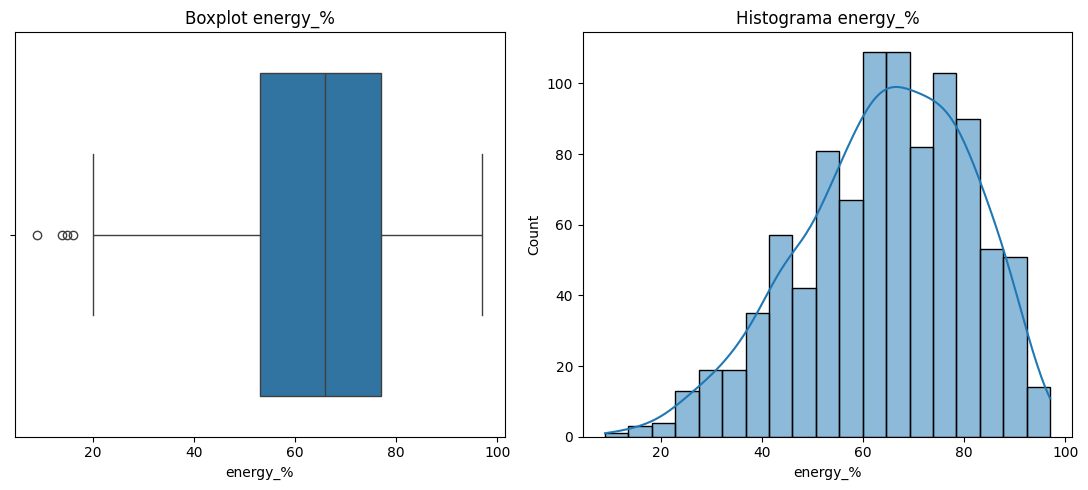

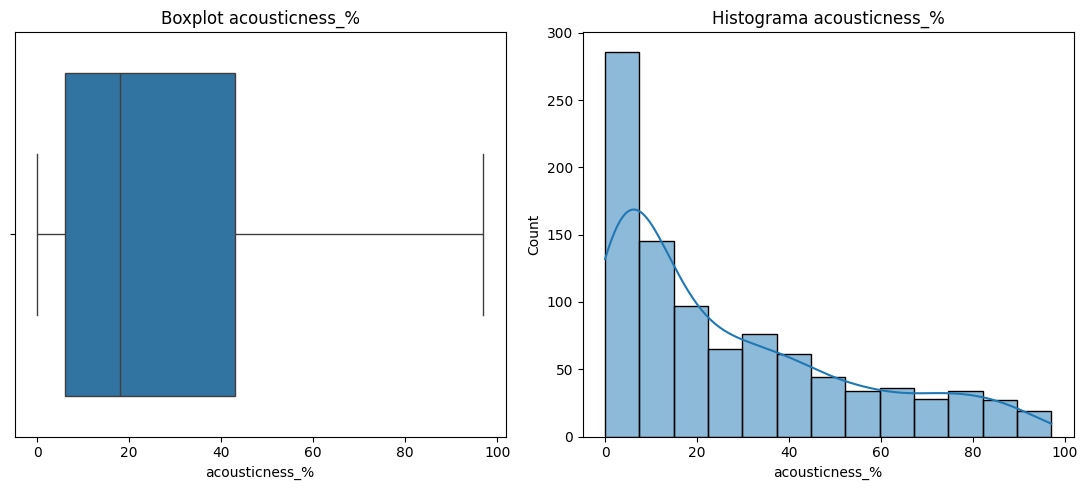

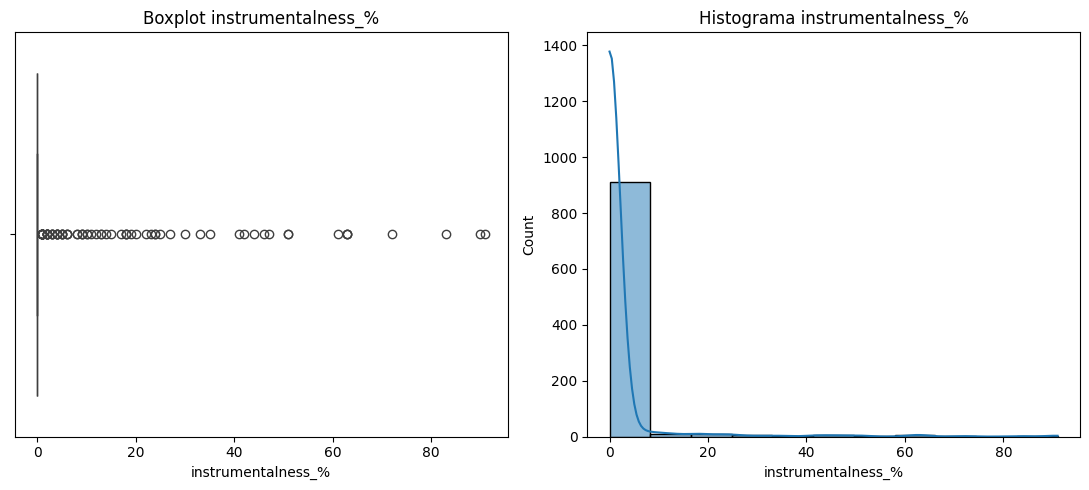

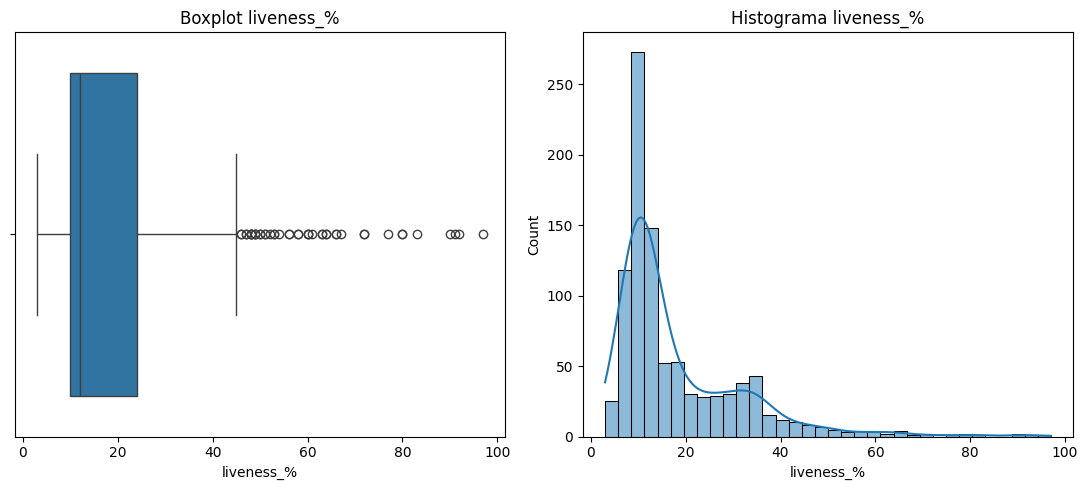

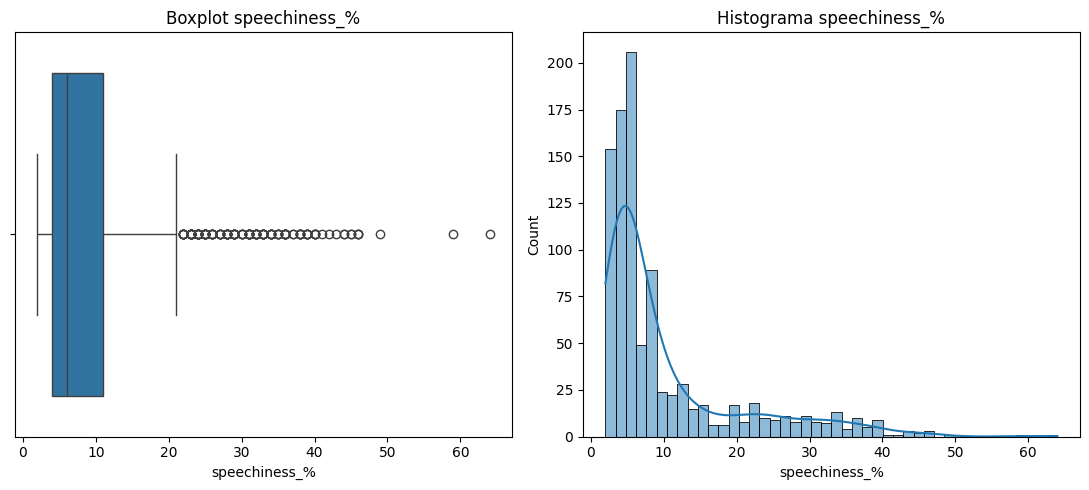

In [9]:
for col in numerical_cols:
    fig, axes = plt.subplots(1, 2, figsize=(11, 5))
    # Caja y Bigotes
    sns.boxplot(x=data[col], ax=axes[0])
    axes[0].set_title(f'Boxplot {col}')
    axes[0].set_xlabel(col)

    # Histograma
    sns.histplot(data[col], kde=True, ax=axes[1])
    axes[1].set_title(f'Histograma {col}')
    axes[1].set_xlabel(col)

    plt.tight_layout()
    plt.show()

<Axes: >

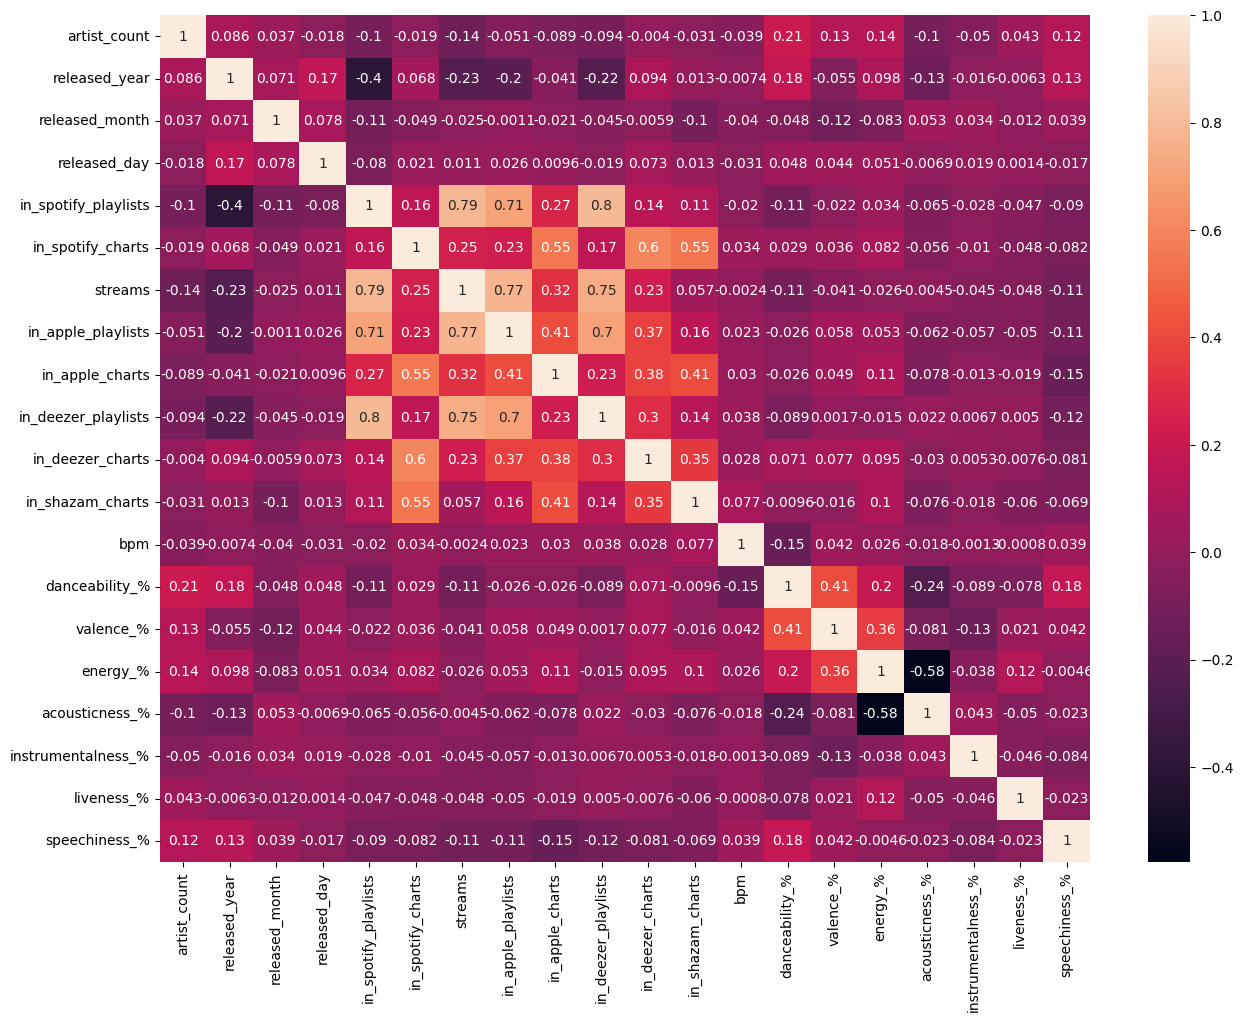

In [10]:
matriz=data[numerical_cols].corr()
plt.figure(figsize=(15, 11))
sns.heatmap(matriz,annot=True)

##Elección de variables para el modelo


Las canciones presentan una relacion entre el numero de streams y aparicion en las principales playlists y charts.

Al analizar correlacion entre variables independientes y dependiente se  consideran a las variables 'in_spotify_playlists' e 'in_apple_charts' como variables independientes del modelo.

In [11]:
x = data[['in_spotify_playlists', 'in_apple_charts']]
y = data['streams']

#División de los datos para entrenamiento y testeo
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=20)

scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"Y_train: {Y_train.shape}")
print(f"Y_test: {Y_test.shape}")

X_train: (761, 2)
X_test: (191, 2)
Y_train: (761,)
Y_test: (191,)


##Creación del modelo

In [12]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

##Resultados del modelo implementado

El modelo explica aproximadamente el 73.63% de la variabilidad de los streams en función de las apariciones en playlists de Spotify y charts de Apple (R²: 0.7362), lo cual es razonable dada la alta variabilidad que presentan los datos. El error cuadrático medio, de aproximadamente 290 mil streams (MSE: 8.6636e+16), refleja la alta variabilidad del conjunto de datos y la influencia de valores extremos. Si se desea una mayor precisión, sería recomendable considerar la eliminación de los valores extremos. Sin embargo, al hacerlo, el modelo podría perder la capacidad de capturar patrones relacionados con escenarios extremos, comunes en los éxitos musicales.

In [13]:
Y_pred = model.predict(X_test)
print(f"MSE: {mean_squared_error(Y_test, Y_pred)}")
if len(Y_test) > 1:
    print(f"R²: {r2_score(Y_test, Y_pred)}")

MSE: 8.663650452189498e+16
R²: 0.7362957280102209


/usr/local/lib/python3.11/dist-packages/matplotlib/tri/_triangulation.py:181: RuntimeWarning: invalid value encountered in cast
  triangles = np.asarray(triangles, dtype=np.int32)


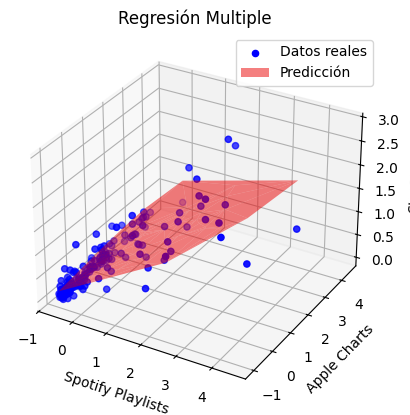

In [14]:
#Visualización de los datos
x1 = X_test[:,0]
x2 = X_test[:,1]

from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Crear la figura y los ejes 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, Y_test, color='blue', label='Datos reales')
ax.plot_trisurf(x1, x2, Y_pred, color='red', alpha=0.5, label='Predicción')

ax.set_xlabel('Spotify Playlists')
ax.set_ylabel('Apple Charts')
ax.set_zlabel('Streams')
ax.set_title('Regresión Multiple')

plt.legend()
plt.show()

De forma alternativa, se podrían emplear otros modelos de machine learning que puedan capturar mejor las relaciones entre variables e incorporar variables adicionales que influyan en los streams, como género musical, características de la canción o artista que la publica con lo que se podría explicar y predecir mejor el número de streams.